
# Phân tích khám phá dữ liệu (EDA) — Pima Indians Diabetes

**Mục lục**  
1. [Tổng quan & Mục tiêu](#intro)  
2. [Xác định bài toán: Input / Output / Mục tiêu](#problem)  
3. [Tải dữ liệu & Kiểm tra tính toàn vẹn dữ liệu (Data Integrity)](#data)  
4. [Các tính chất thống kê trên dữ liệu số (Descriptive Statistics)](#stats)  
5. [Mối tương quan giữa các tính chất (Correlations)](#corr)  
6. [Tần số xuất hiện theo lớp & dữ liệu danh mục (Class/Category Distributions)](#class)  
7. [Hiển thị dữ liệu — Univariate Plots (bao gồm Box & Whisker)](#visual)  
8. [Kết luận sơ bộ](#conclude)



<a id='intro'></a>
# 1. Tổng quan & Mục tiêu
- Hiểu rõ cấu trúc dữ liệu, các biến đầu vào và biến mục tiêu.  
- Kiểm tra **tính toàn vẹn dữ liệu** (missing, duplicate, anomalous values).  
- Tính các **đặc trưng thống kê** của các biến số (mean, median, std, skewness, kurtosis).  
- Phân tích **mối tương quan** giữa các biến.  
- Xem **tần số/ phân phối** theo lớp (Outcome) và các biến danh mục (nếu có).  
- Hiển thị trực quan (visualize) từng tính chất đơn — đặc biệt **Box-and-Whisker plots** với giải thích cách đọc (theo đơn vị tham khảo: simplypsychology.org).



<a id='problem'></a>
# 2. Xác định bài toán: Input / Output / Mục tiêu

- **Input (features)**: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.  
- **Output (target)**: Outcome (0 = không bị tiểu đường, 1 = bị tiểu đường).  
- **Mục tiêu**: Thực hiện EDA chi tiết — chuẩn bị dữ liệu cho các bước modeling tiếp theo (imputation, scaling, feature engineering).


In [1]:

# Mục đích: Load dữ liệu nếu có 'diabetes.csv', nếu không tạo dữ liệu giả lập Pima-like để demo
import os, pandas as pd, numpy as np
np.random.seed(42)

if os.path.exists('diabetes.csv'):
    df = pd.read_csv('diabetes.csv')
    print('Đã load file diabetes.csv từ thư mục làm việc.')
else:
    print('Không tìm thấy diabetes.csv — sử dụng dữ liệu giả lập cho demo.')
    df = pd.DataFrame({
        "Pregnancies": np.random.randint(0,15,768),
        "Glucose": np.random.normal(120,30,768).clip(0),
        "BloodPressure": np.random.normal(70,12,768).clip(0),
        "SkinThickness": np.random.normal(20,10,768).clip(0),
        "Insulin": np.random.normal(80,40,768).clip(0),
        "BMI": np.random.normal(32,7,768).clip(0),
        "DiabetesPedigreeFunction": np.random.rand(768)*2.5,
        "Age": np.random.randint(21,80,768),
        "Outcome": np.random.randint(0,2,768)
    })

# Hiển thị vài dòng đầu để kiểm tra
print('Kích thước dữ liệu:', df.shape)
df.head()


Không tìm thấy diabetes.csv — sử dụng dữ liệu giả lập cho demo.
Kích thước dữ liệu: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,76.780418,61.095763,19.217293,76.733159,30.456597,0.823077,43,1
1,3,128.079530,54.344135,16.543905,101.735183,30.147697,0.131204,77,1
2,12,174.409997,86.854520,33.970795,145.226711,43.328669,1.125591,63,1
3,14,132.137487,50.733479,50.871552,176.791669,30.172677,0.636872,37,1
4,10,122.702178,76.045788,24.487805,132.794427,30.147501,0.879712,78,0


In [2]:

# Mục đích: Kiểm tra tính toàn vẹn dữ liệu — missing values, duplicate, logical ranges
import pandas as pd, numpy as np

# Số giá trị null/NaN trên mỗi cột
print('Số giá trị null/NaN trên mỗi cột:')
display(df.isnull().sum())

# Số hàng duplicate hoàn toàn
dups = df.duplicated().sum()
print(f'Number of fully duplicated rows: {dups}')

# Kiểm tra các giá trị phi lý (ví dụ: âm, hoặc BMI = 0 trong dataset thực)
print('\nKiểm tra các giá trị bất thường (ví dụ: giá trị âm, hoặc giá trị 0 cho các cột không hợp lý):')
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        neg = (df[c] < 0).sum()
        zeros = (df[c] == 0).sum()
        print(f'{c}: negative={neg}, zeros={zeros}')


Số giá trị null/NaN trên mỗi cột:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Number of fully duplicated rows: 0

Kiểm tra các giá trị bất thường (ví dụ: giá trị âm, hoặc giá trị 0 cho các cột không hợp lý):
Pregnancies: negative=0, zeros=65
Glucose: negative=0, zeros=0
BloodPressure: negative=0, zeros=0
SkinThickness: negative=0, zeros=24
Insulin: negative=0, zeros=20
BMI: negative=0, zeros=0
DiabetesPedigreeFunction: negative=0, zeros=0
Age: negative=0, zeros=0
Outcome: negative=0, zeros=386



### Ghi chú về giá trị 0
Trong *Pima dataset* gốc, một số cột như Glucose, BloodPressure, SkinThickness, Insulin, BMI sử dụng giá trị 0 để biểu thị *missing*.  
Ở phần tiếp theo ta sẽ **thay các giá trị 0 bằng NaN** cho những cột này (nếu xuất hiện) để dễ xử lý imputation sau này.


In [3]:

# Mục đích: Thay các giá trị 0 bằng NaN ở các cột thường bị gán 0 để biểu thị missing
cols_zero_as_nan = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for c in cols_zero_as_nan:
    if c in df.columns:
        df[c] = df[c].replace(0, np.nan)
print('Sau khi thay 0->NaN, số missing:')
display(df.isnull().sum())


Sau khi thay 0->NaN, số missing:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,24
Insulin,20
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0



<a id='stats'></a>
# 4. Các tính chất thống kê trên dữ liệu số

Ở phần này ta sẽ tính và trình bày các chỉ số mô tả: **số lượng, mean, median, standard deviation, min, max, skewness, kurtosis** cho các biến số liên tục.


In [4]:

# Mục đích: Tính các thống kê mô tả bao gồm skewness và kurtosis
import pandas as pd
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
desc = df[numeric_cols].describe().T
desc['median'] = df[numeric_cols].median()
desc['skewness'] = df[numeric_cols].skew()
desc['kurtosis'] = df[numeric_cols].kurtosis()
desc = desc[['count','mean','median','std','min','25%','50%','75%','max','skewness','kurtosis']]
display(desc.round(4))


,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Pregnancies,768.0,6.8750,7.0000,4.3644,0.0000,3.0000,7.0000,11.0000,14.0000,0.0011,-1.2386
Glucose,768.0,121.8608,122.4250,31.7848,12.9538,101.4820,122.4250,142.9555,215.2333,-0.1004,0.1120
BloodPressure,768.0,69.7884,69.6533,12.3201,29.3389,61.5879,69.6533,78.8015,107.7036,0.0035,-0.0323
SkinThickness,744.0,21.6993,21.6390,9.6637,0.1434,15.0255,21.6390,27.7021,52.6049,0.1957,-0.0960
Insulin,748.0,81.5972,81.9432,36.5332,0.1489,54.9225,81.9432,106.6685,181.1826,0.1342,-0.4223
BMI,768.0,32.1488,31.9428,6.9252,13.4563,27.5927,31.9428,36.8975,57.6039,0.0690,0.0373
DiabetesPedigreeFunction,768.0,1.2148,1.2084,0.7449,0.0016,0.5515,1.2084,1.8662,2.4976,0.0481,-1.2527
Age,768.0,50.9818,51.0000,16.5471,21.0000,37.0000,51.0000,65.0000,79.0000,-0.0195,-1.1666
Outcome,768.0,0.4974,0.0000,0.5003,0.0000,0.0000,0.0000,1.0000,1.0000,0.0104,-2.0051



<a id='corr'></a>
# 5. Mối tương quan giữa các tính chất (Correlations)

Ta sẽ tính ma trận tương quan (Pearson) giữa các biến số liên tục. Lưu ý: trước khi tính correlation ta sẽ điền tạm missing bằng median để tránh NaN khi tính correlation.


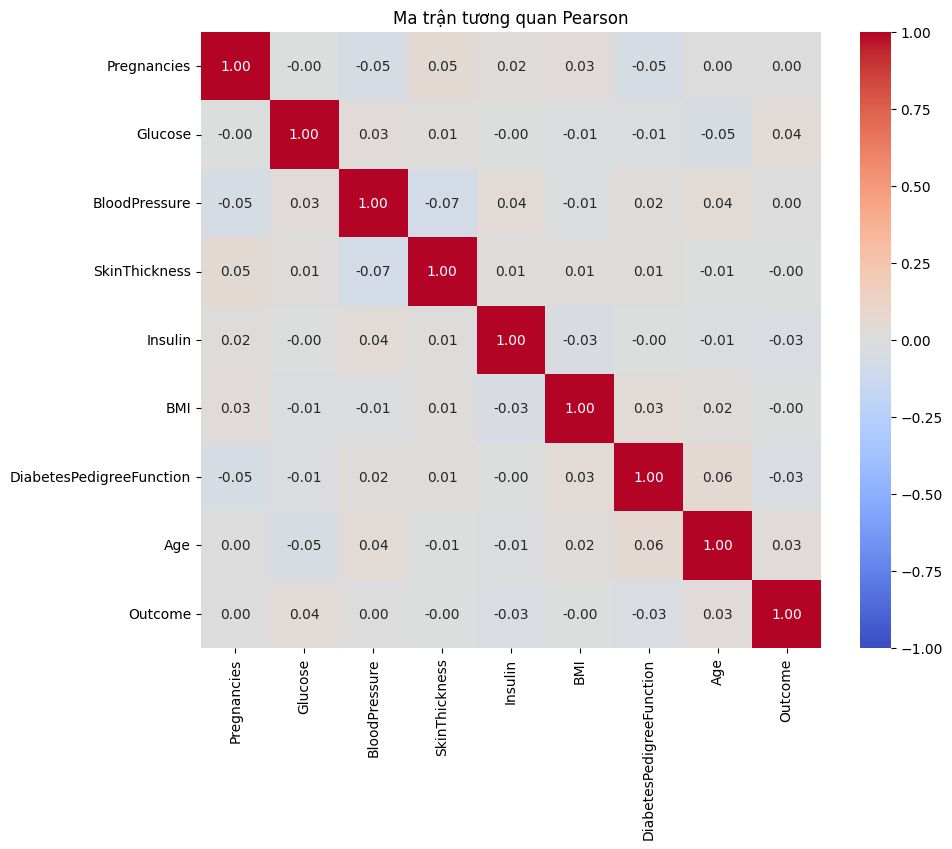


Các cặp biến có tương quan mạnh (|r| > 0.5):


In [5]:

# Mục đích: Tính và vẽ heatmap correlation (dùng median imputation tạm thời)
import seaborn as sns, matplotlib.pyplot as plt
df_corr = df.copy()
num_cols = df_corr.select_dtypes(include=[np.number]).columns.tolist()
df_corr[num_cols] = df_corr[num_cols].fillna(df_corr[num_cols].median())
corr = df_corr[num_cols].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan Pearson')
plt.show()

# In ra các cặp có tương quan mạnh (giá trị tuyệt đối > 0.5), để dễ xem
strong_pairs = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i,j]) > 0.5:
            strong_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i,j]))
print('\nCác cặp biến có tương quan mạnh (|r| > 0.5):')
for a,b,v in strong_pairs:
    print(f'{a} <-> {b}: r = {v:.2f}')



<a id='class'></a>
# 6. Tần số xuất hiện (Distribution) theo lớp (Class) và dữ liệu danh mục (Category)

- Đếm số mẫu theo `Outcome` (nhãn).  
- Với các biến phân loại (nếu có), vẽ biểu đồ tần suất (countplot).  
- Với các biến liên tục, so sánh phân phối giữa các lớp (Outcome=0 vs Outcome=1).


Số mẫu theo Outcome:


,count
Outcome,
0,386
1,382


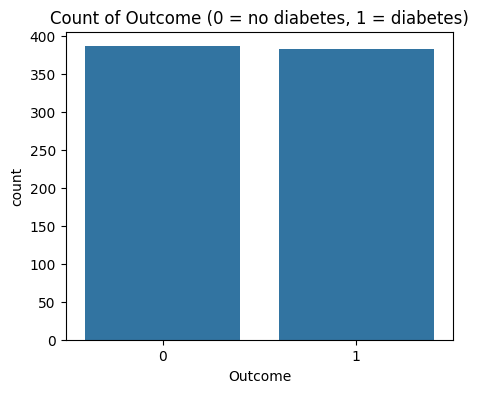

In [6]:

# Mục đích: In tần số của lớp Outcome và vẽ countplot
import matplotlib.pyplot as plt, seaborn as sns
if 'Outcome' in df.columns:
    print('Số mẫu theo Outcome:')
    display(df['Outcome'].value_counts())
    plt.figure(figsize=(5,4))
    sns.countplot(x='Outcome', data=df)
    plt.title('Count of Outcome (0 = no diabetes, 1 = diabetes)')
    plt.show()
else:
    print('Không có cột Outcome trong dữ liệu.')


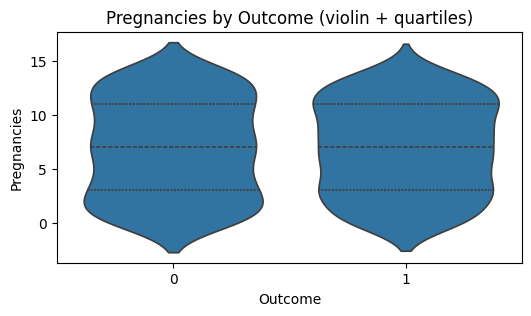

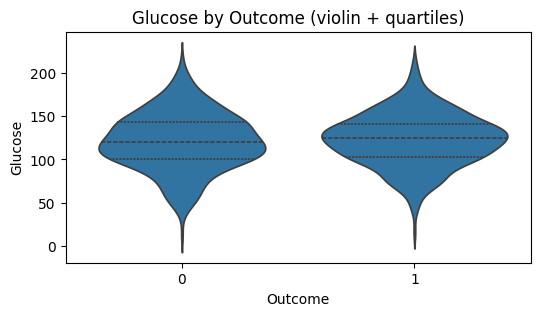

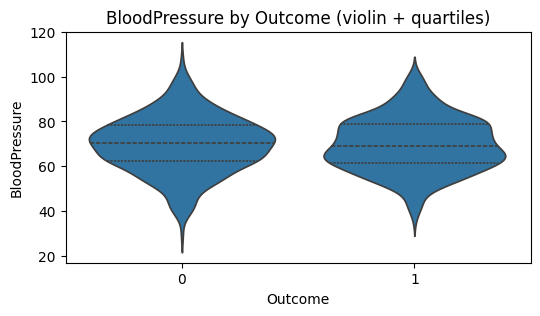

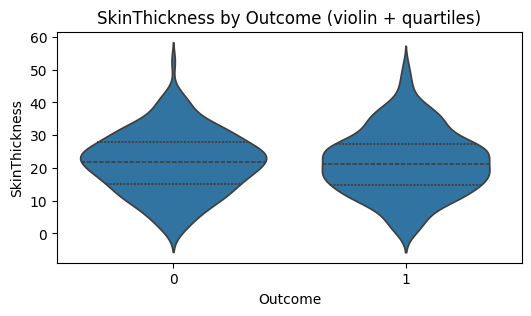

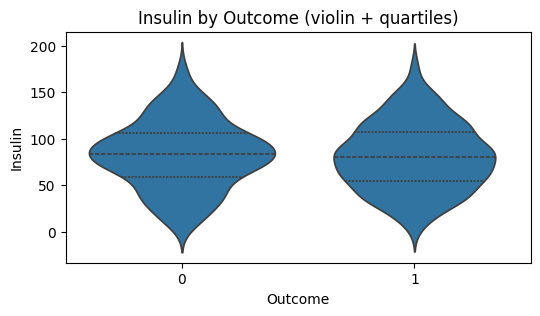

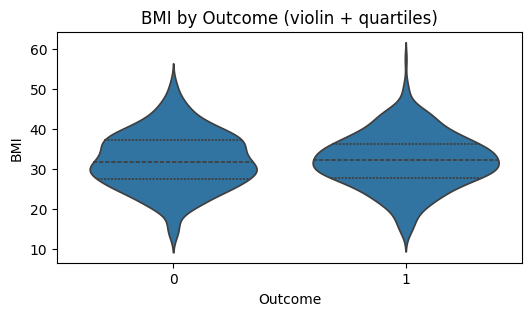

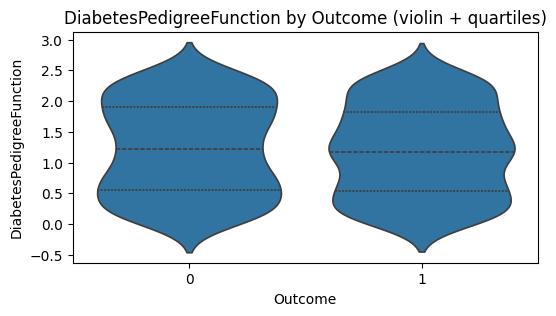

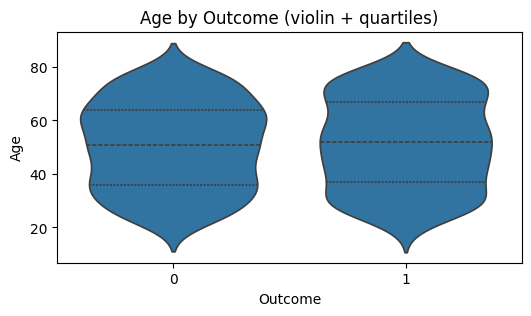

In [7]:

# Mục đích: So sánh phân phối của các biến liên tục giữa Outcome=0 và Outcome=1 (violin + box)
cont_cols = [c for c in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'] if c in df.columns]
for c in cont_cols:
    plt.figure(figsize=(6,3))
    sns.violinplot(x='Outcome', y=c, data=df, inner='quartile')
    plt.title(f'{c} by Outcome (violin + quartiles)')
    plt.show()



<a id='visual'></a>
# 7. Hiển thị dữ liệu (Visualize Data) — Univariate Plots

Phần này chứa các biểu đồ đơn (univariate) cho từng biến liên tục: histogram + KDE, box-and-whisker plots. Mỗi biểu đồ có chú thích mục đích và cách đọc (tiếng Việt).

**Hướng dẫn đọc Boxplot (nhắc lại ngắn):**  
- Đường median (giữa hộp) biểu thị trung vị. So sánh median giữa các nhóm để kiểm tra sự khác biệt.  
- Chiều dài hộp (IQR) biểu thị phân tán trung tâm; whiskers thường kéo đến 1.5*IQR.  
- Điểm nằm ngoài whiskers là outlier.  
- Vị trí median và chiều dài whiskers cho biết độ lệch (skewness) của phân phối.


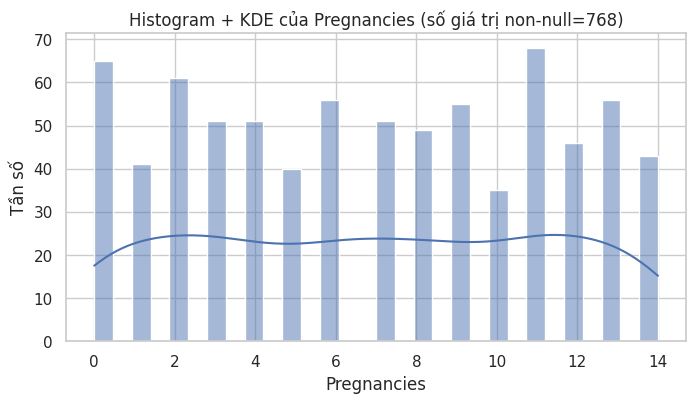

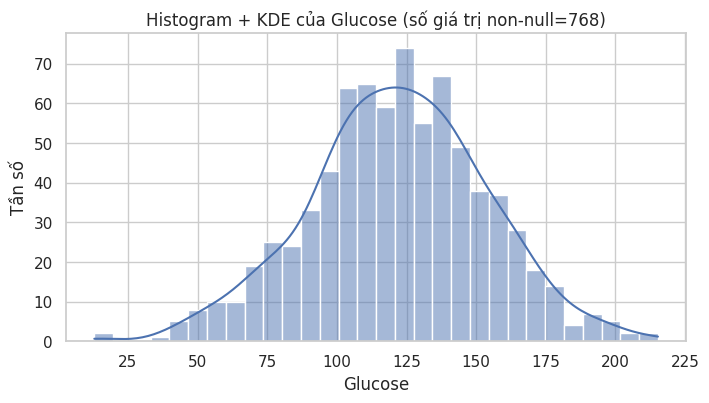

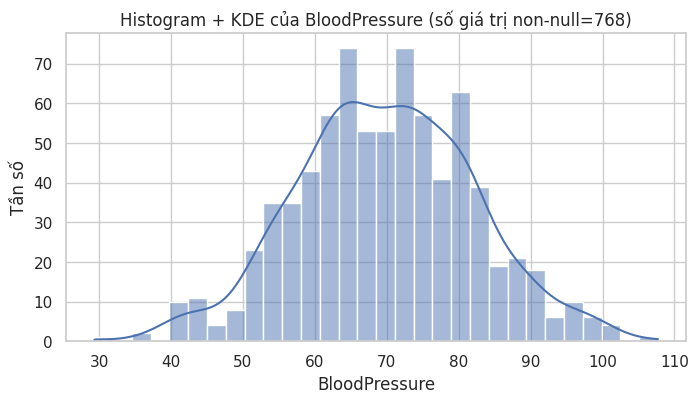

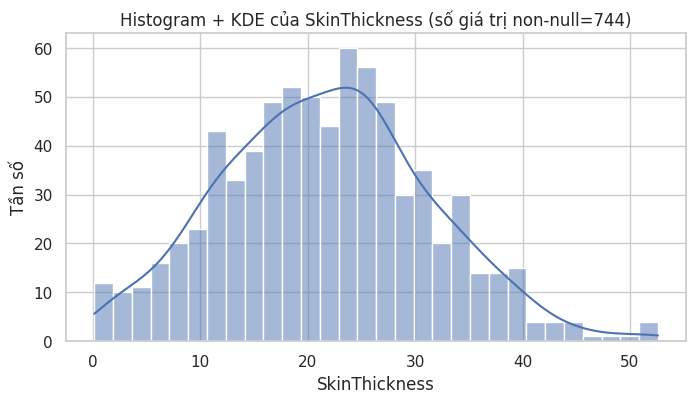

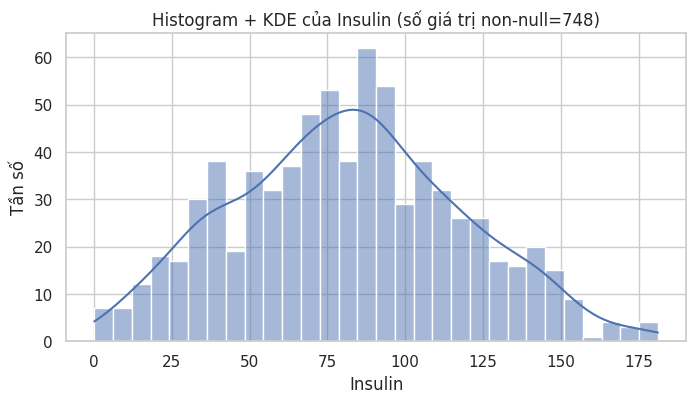

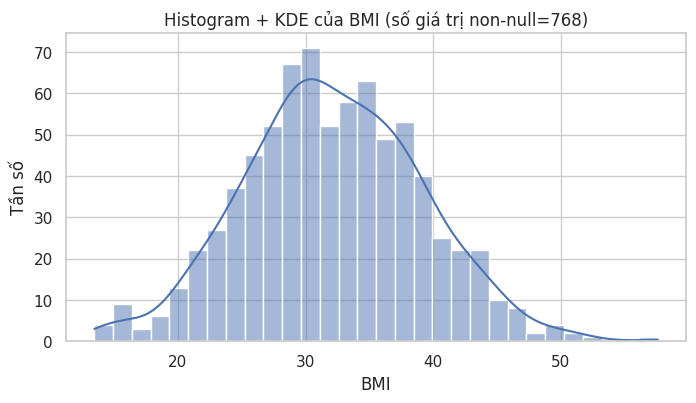

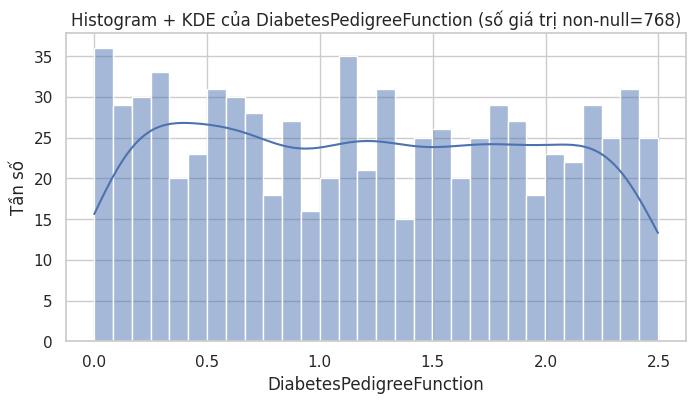

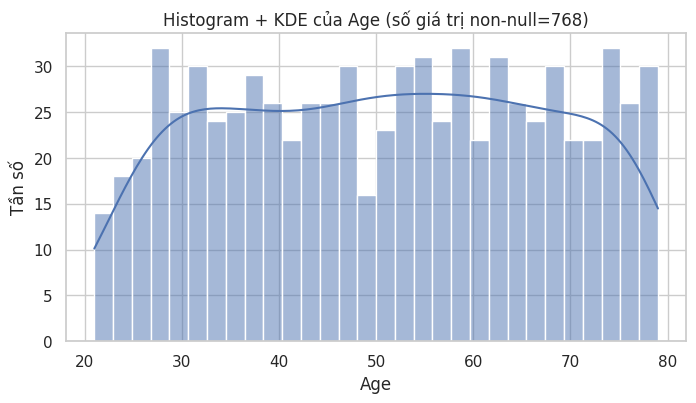

In [8]:

# Mục đích: Vẽ histogram + KDE cho từng biến (univariate)
import matplotlib.pyplot as plt, seaborn as sns
sns.set(style='whitegrid')
for c in cont_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[c].dropna(), kde=True, bins=30)
    plt.title(f'Histogram + KDE của {c} (số giá trị non-null={df[c].notna().sum()})')
    plt.xlabel(c)
    plt.ylabel('Tần số')
    plt.show()


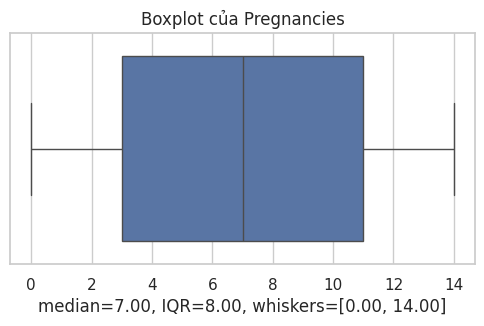

Giải thích cho Pregnancies:
 - Median = 7.00
 - IQR (Q3-Q1) = 8.00 -> hộp dài => phân tán lớn hơn.
 - Khoảng whiskers ~ [0.00, 14.00]. Các điểm ngoài khoảng này là outliers.
 - Nếu median lệch về phía trên/hay dưới trong hộp thì phân phối bị lệch trái/phải tương ứng.



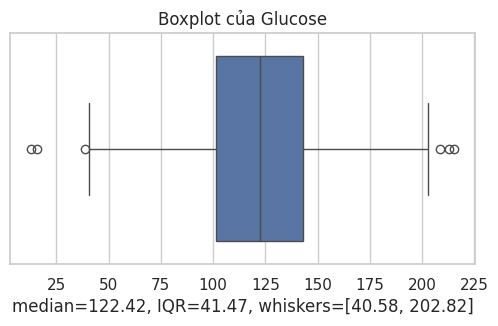

Giải thích cho Glucose:
 - Median = 122.42
 - IQR (Q3-Q1) = 41.47 -> hộp dài => phân tán lớn hơn.
 - Khoảng whiskers ~ [40.58, 202.82]. Các điểm ngoài khoảng này là outliers.
 - Nếu median lệch về phía trên/hay dưới trong hộp thì phân phối bị lệch trái/phải tương ứng.



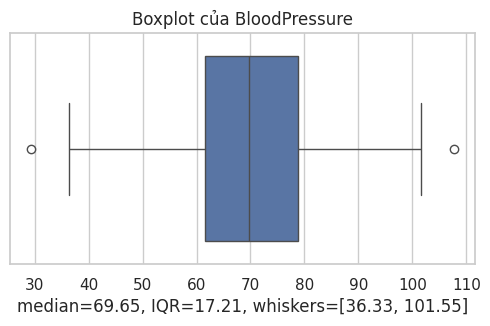

Giải thích cho BloodPressure:
 - Median = 69.65
 - IQR (Q3-Q1) = 17.21 -> hộp dài => phân tán lớn hơn.
 - Khoảng whiskers ~ [36.33, 101.55]. Các điểm ngoài khoảng này là outliers.
 - Nếu median lệch về phía trên/hay dưới trong hộp thì phân phối bị lệch trái/phải tương ứng.



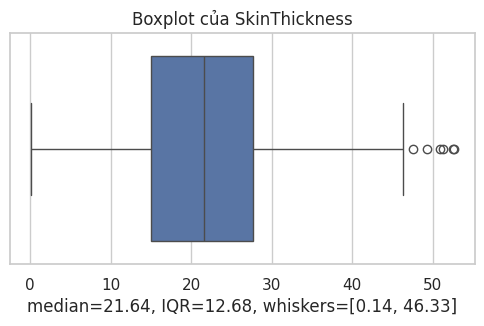

Giải thích cho SkinThickness:
 - Median = 21.64
 - IQR (Q3-Q1) = 12.68 -> hộp dài => phân tán lớn hơn.
 - Khoảng whiskers ~ [0.14, 46.33]. Các điểm ngoài khoảng này là outliers.
 - Nếu median lệch về phía trên/hay dưới trong hộp thì phân phối bị lệch trái/phải tương ứng.



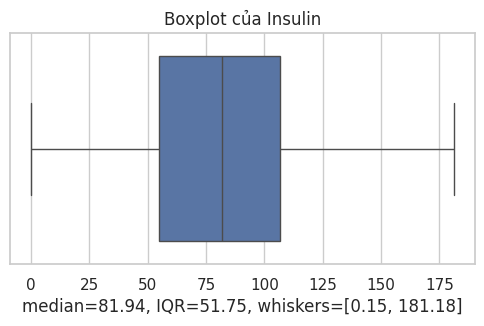

Giải thích cho Insulin:
 - Median = 81.94
 - IQR (Q3-Q1) = 51.75 -> hộp dài => phân tán lớn hơn.
 - Khoảng whiskers ~ [0.15, 181.18]. Các điểm ngoài khoảng này là outliers.
 - Nếu median lệch về phía trên/hay dưới trong hộp thì phân phối bị lệch trái/phải tương ứng.



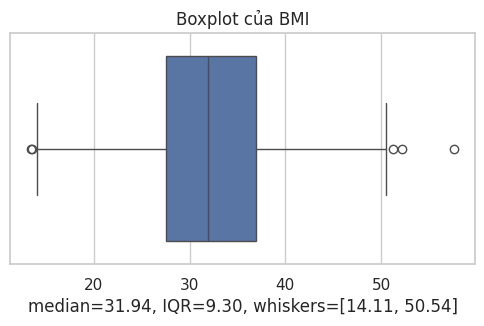

Giải thích cho BMI:
 - Median = 31.94
 - IQR (Q3-Q1) = 9.30 -> hộp dài => phân tán lớn hơn.
 - Khoảng whiskers ~ [14.11, 50.54]. Các điểm ngoài khoảng này là outliers.
 - Nếu median lệch về phía trên/hay dưới trong hộp thì phân phối bị lệch trái/phải tương ứng.



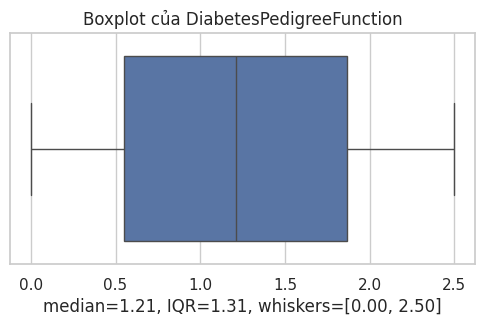

Giải thích cho DiabetesPedigreeFunction:
 - Median = 1.21
 - IQR (Q3-Q1) = 1.31 -> hộp dài => phân tán lớn hơn.
 - Khoảng whiskers ~ [0.00, 2.50]. Các điểm ngoài khoảng này là outliers.
 - Nếu median lệch về phía trên/hay dưới trong hộp thì phân phối bị lệch trái/phải tương ứng.



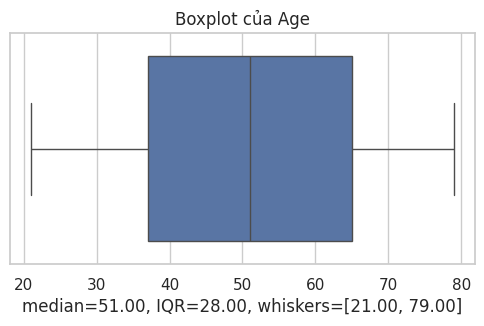

Giải thích cho Age:
 - Median = 51.00
 - IQR (Q3-Q1) = 28.00 -> hộp dài => phân tán lớn hơn.
 - Khoảng whiskers ~ [21.00, 79.00]. Các điểm ngoài khoảng này là outliers.
 - Nếu median lệch về phía trên/hay dưới trong hộp thì phân phối bị lệch trái/phải tương ứng.



In [9]:

# Mục đích: Vẽ Box-and-Whisker plots cho từng biến
import matplotlib.pyplot as plt, seaborn as sns
for c in cont_cols:
    plt.figure(figsize=(6,3))
    ax = sns.boxplot(x=df[c])
    plt.title(f'Boxplot của {c}')
    median = df[c].median(skipna=True)
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = df[c].dropna()[df[c] >= (q1 - 1.5*iqr)].min()
    upper_whisker = df[c].dropna()[df[c] <= (q3 + 1.5*iqr)].max()
    plt.xlabel(f'median={median:.2f}, IQR={iqr:.2f}, whiskers=[{lower_whisker:.2f}, {upper_whisker:.2f}]')
    plt.show()
    print(f'Giải thích cho {c}:')
    print(f' - Median = {median:.2f}')
    print(f' - IQR (Q3-Q1) = {iqr:.2f} -> hộp dài => phân tán lớn hơn.')
    print(f' - Khoảng whiskers ~ [{lower_whisker:.2f}, {upper_whisker:.2f}]. Các điểm ngoài khoảng này là outliers.')
    print(' - Nếu median lệch về phía trên/hay dưới trong hộp thì phân phối bị lệch trái/phải tương ứng.\n')


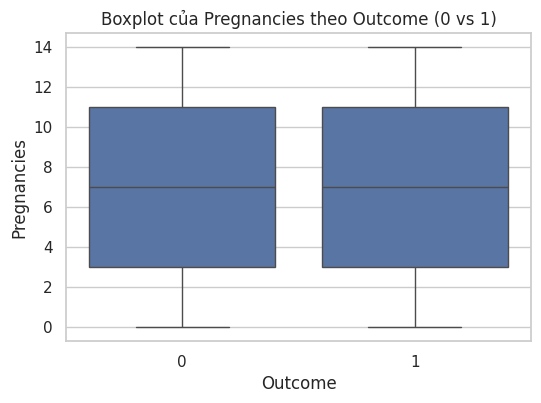

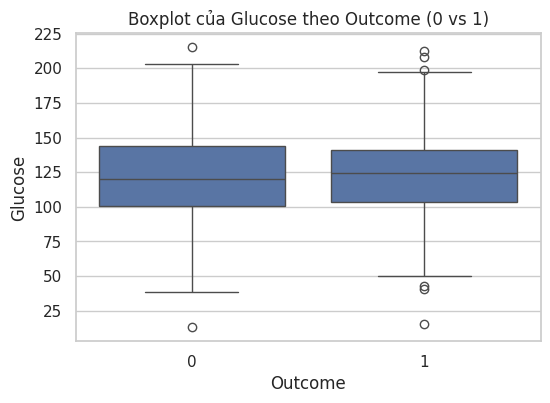

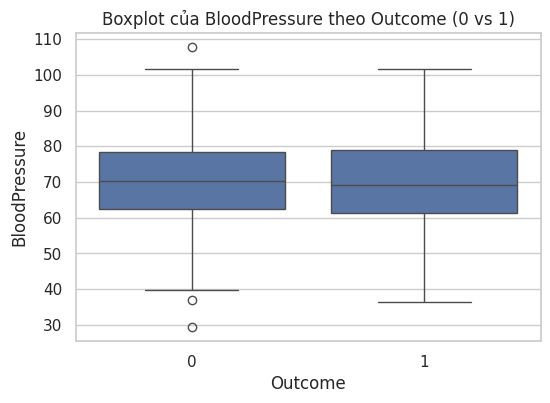

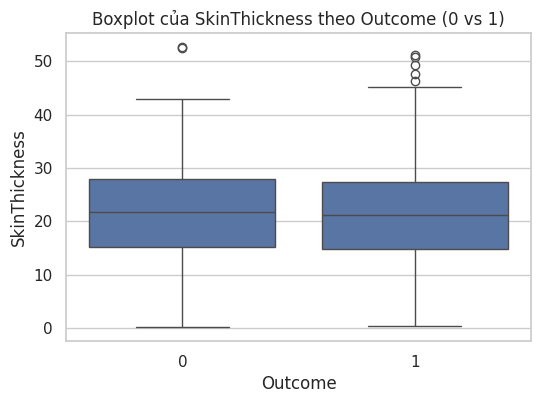

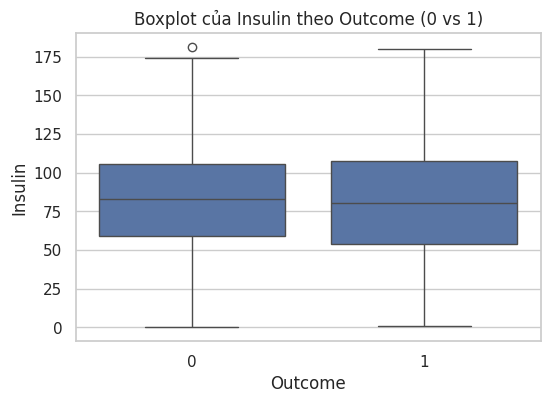

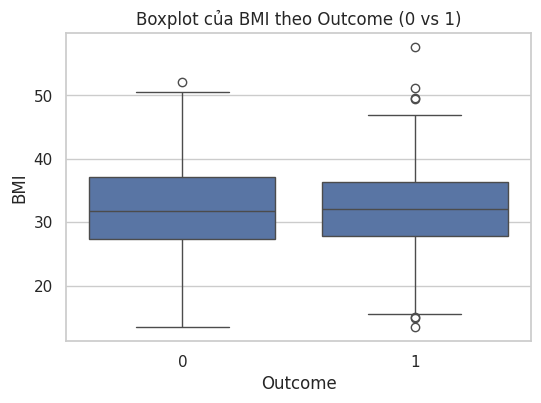

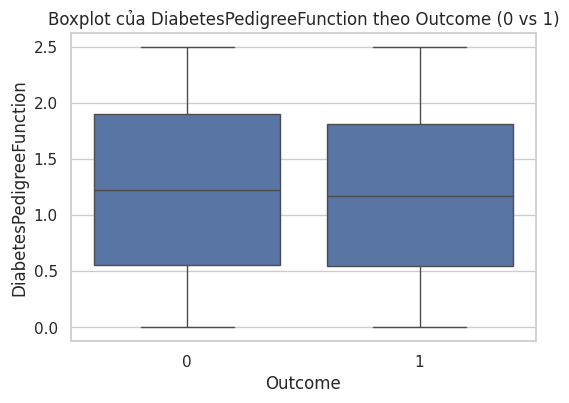

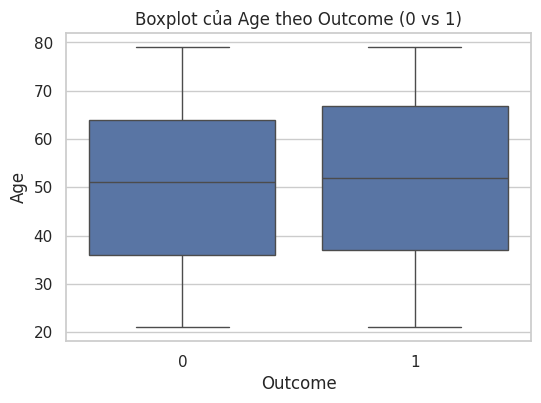

In [10]:

# Mục đích: So sánh boxplots của cùng một biến theo Outcome (nếu có) để thấy khác biệt giữa nhóm
if 'Outcome' in df.columns:
    for c in cont_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='Outcome', y=c, data=df)
        plt.title(f'Boxplot của {c} theo Outcome (0 vs 1)')
        plt.show()
else:
    print('Không có Outcome để so sánh.')



### Pairplot (tùy chọn)
Pairplot giúp quan sát quan hệ cặp giữa các biến liên tục — tiện để phát hiện mối tương quan phi tuyến hoặc cụm.


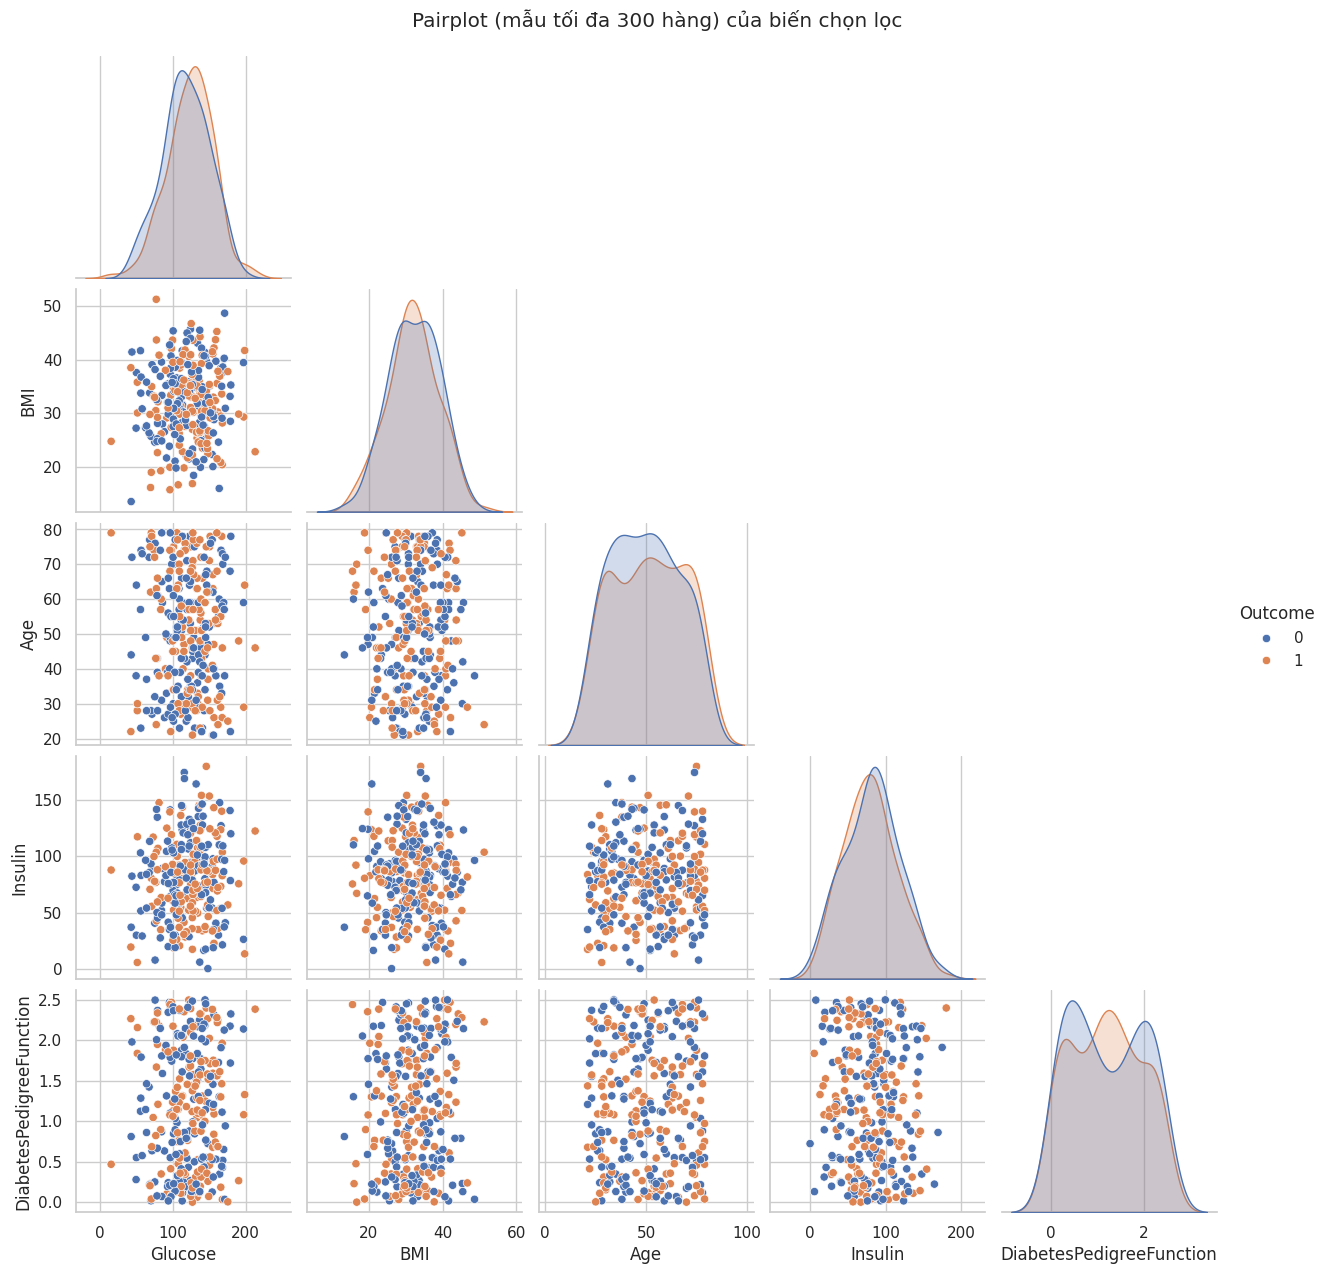

In [11]:

# Mục đích: Vẽ pairplot cho một số biến chọn lọc (chọn 5 biến để pairplot không quá chậm)
sample_cols = [c for c in ['Glucose','BMI','Age','Insulin','DiabetesPedigreeFunction'] if c in df.columns]
import seaborn as sns
sns.pairplot(df[sample_cols + (['Outcome'] if 'Outcome' in df.columns else [])].dropna().sample(n=min(300, len(df))), hue='Outcome' if 'Outcome' in df.columns else None, diag_kind='kde', corner=True)
plt.suptitle('Pairplot (mẫu tối đa 300 hàng) của biến chọn lọc', y=1.02)
plt.show()



<a id='conclude'></a>
# 8. Kết luận sơ bộ
- Kiểm tra tính toàn vẹn: phát hiện các giá trị 0 cần được coi là missing ở một số cột.  
- Các biến có liên quan mạnh đến Outcome thường là *Glucose*, *BMI*, *Age*.  
- Boxplots cung cấp thông tin về median, IQR, outliers và skewness; khi median khác biệt rõ rệt giữa hai nhóm Outcome thì biến đó có tính phân biệt.  
